In [1]:
# k-Nearest Neighbors with Gradient Boosting Feature Selection Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\gb_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,damage_grade
179999,15,1338,2,5,r,n,f,q,0,1,0,0,1
215626,26,36,2,0,r,n,v,q,0,0,0,0,1
101192,13,1125,3,35,r,q,x,q,0,1,0,0,1
241892,21,363,1,0,w,n,f,j,0,0,0,0,1
54102,16,400,3,10,r,n,x,x,0,1,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])

In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,damage_grade
179999,15,1338,2,5,2,0,0,1,0,1,0,0,1
215626,26,36,2,0,2,0,2,1,0,0,0,0,1
101192,13,1125,3,35,2,1,3,1,0,1,0,0,1
241892,21,363,1,0,4,0,0,0,0,0,0,0,1
54102,16,400,3,10,2,0,3,3,0,1,0,0,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,12].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=275)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=275)

In [15]:
y_pred = classifier.predict(X_test)


C:\Users\Brad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.70      0.66      5011
           2       0.49      0.33      0.39      5075
           3       0.51      0.62      0.56      4989

    accuracy                           0.55     15075
   macro avg       0.54      0.55      0.53     15075
weighted avg       0.54      0.55      0.53     15075



In [17]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']

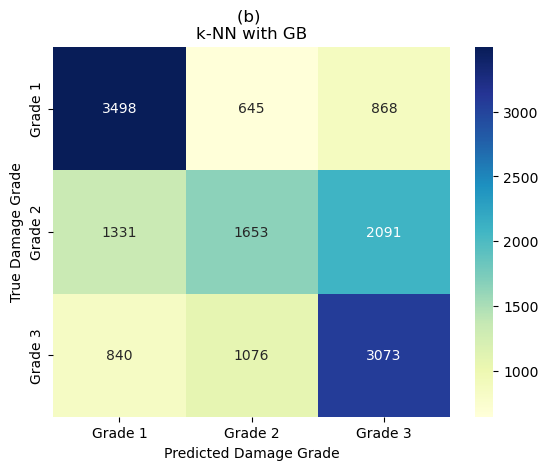

In [19]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
# plt.title("k-NN w/ Merged FS Prediction Matrix")
plt.title("(b) \nk-NN with GB")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()